In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# Load the csv file into a variable called data
data = 'breast-cancer.csv'

In [87]:
# Load the data into a pandas dataframe
df = pd.read_csv(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
# Drop the id column
df.drop('id', axis=1, inplace=True)

In [89]:
df.shape[0], df.shape[1]

(569, 31)

In [90]:
df.describe(exclude=['object'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [130]:
missing_values = df.isnull().sum().head(5)
missing_values

diagnosis         0
radius_mean       0
texture_mean      0
perimeter_mean    0
area_mean         0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [93]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [94]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
df['radius_mean'].mean(), df['radius_mean'].std(), df['radius_mean'].max(), df['radius_mean'].min()

(np.float64(14.127291739894552),
 np.float64(3.5240488262120775),
 np.float64(28.11),
 np.float64(6.981))

In [96]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
df['diagnosis'] = df['diagnosis'].apply(lambda x : 1 if x=='M' else 0)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
df[['radius_mean','diagnosis']].value_counts().sort_index()

radius_mean  diagnosis
6.981        0            1
7.691        0            1
7.729        0            1
7.760        0            1
8.196        0            1
                         ..
25.220       1            1
25.730       1            1
27.220       1            1
27.420       1            1
28.110       1            1
Name: count, Length: 480, dtype: int64

In [101]:
df.corr()['diagnosis'].sort_values(ascending=True)


smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

<Axes: >

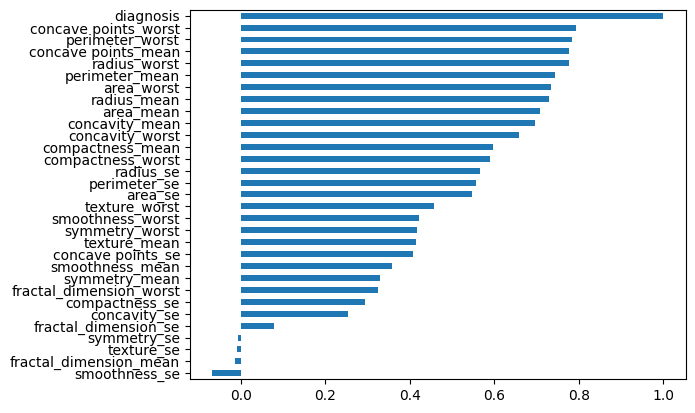

In [102]:
df.corr()['diagnosis'].sort_values(ascending=True).plot(kind='barh')


C:\Users\Douglas\AppData\Local\Temp\ipykernel_19384\1724983381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='diagnosis', x='radius_mean', data=df, orient='h', palette='Set2', linewidth=2.5, width=0.6, fliersize=8)


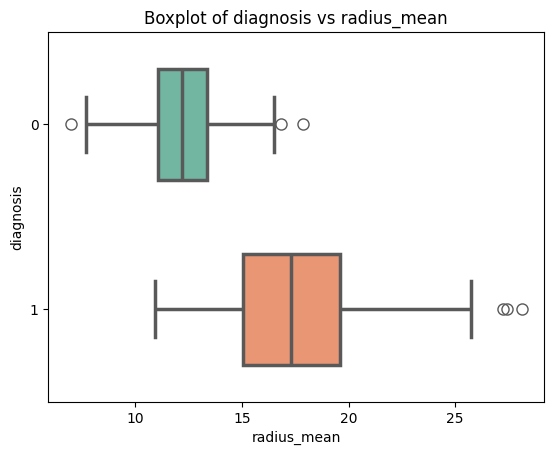

In [103]:
sns.boxplot(y='diagnosis', x='radius_mean', data=df, orient='h', palette='Set2', linewidth=2.5, width=0.6, fliersize=8)
plt.title('Boxplot of diagnosis vs radius_mean')
plt.show()

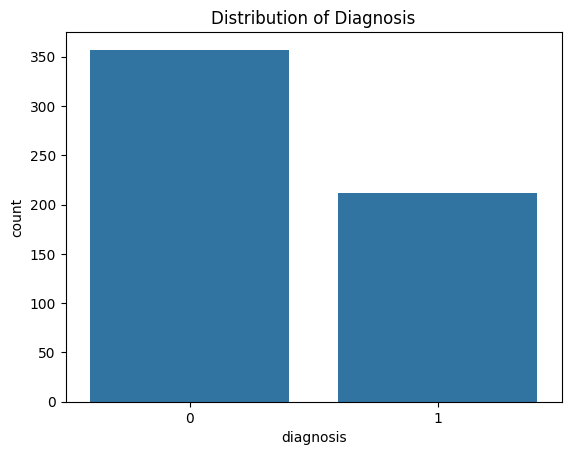

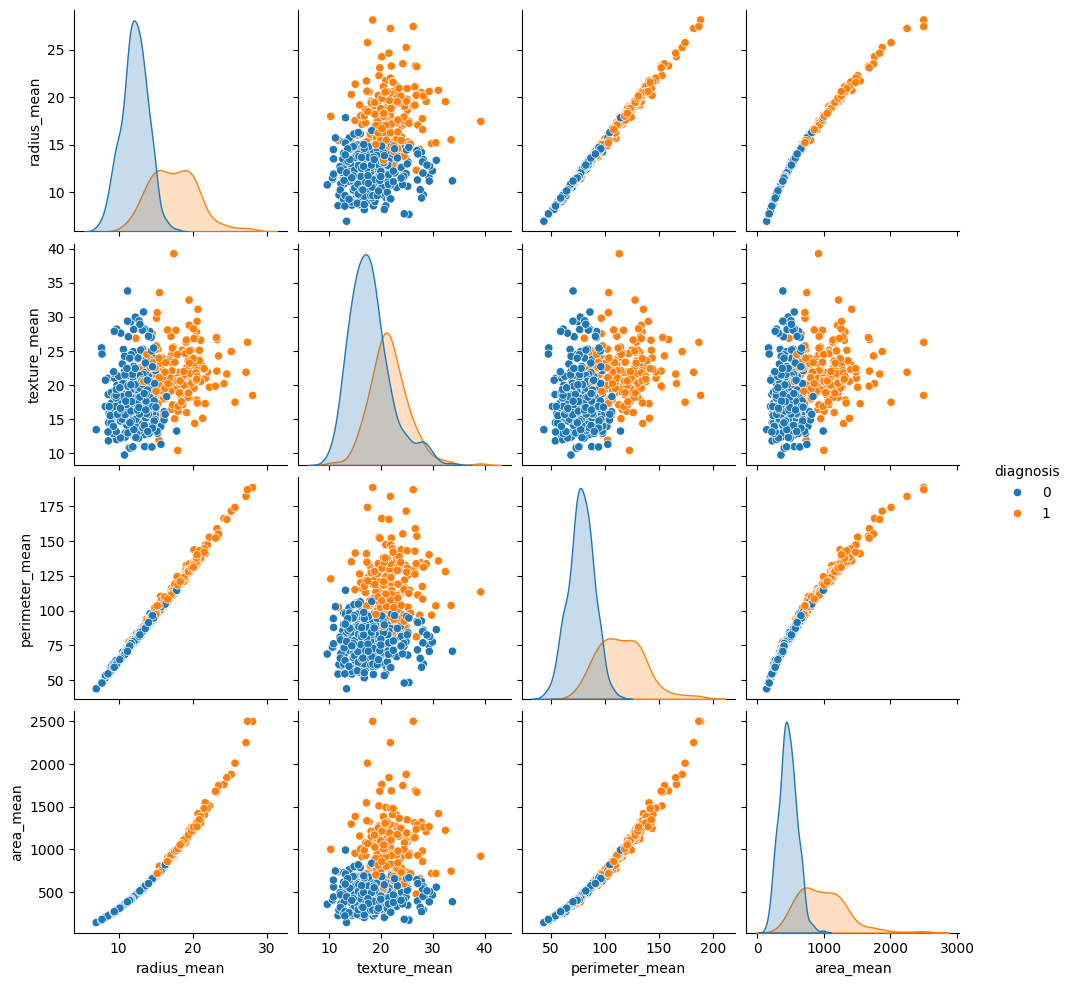

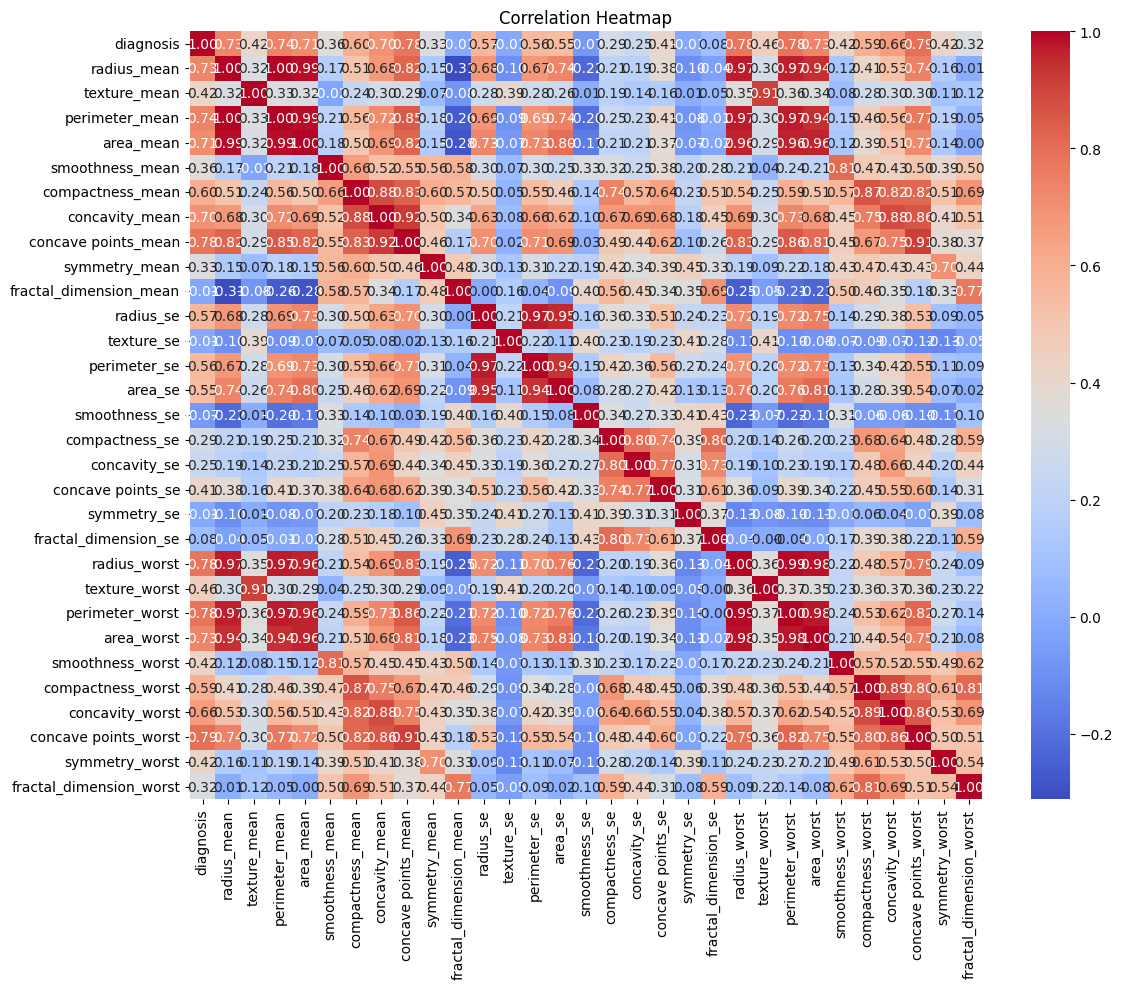

In [104]:
# Distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [134]:
# Prepare the data for training
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [135]:
# Initialize the logistic regression model
linear_model = LogisticRegression(max_iter=10000)

# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred = linear_model.predict(X_test_scaled)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.03
R^2 Score: 0.89


In [136]:
# Create new data for prediction
new_data = {
    'radius_mean': [5.99, 20.57,],
    'texture_mean': [10.38, 17.77],
    'perimeter_mean': [122.8, 132.9],
    'area_mean': [100, 1326],
    'smoothness_mean': [0.1184, 0.0847],
    'compactness_mean': [0.2776, 0.1710],
    'concavity_mean': [0.3001, 0.1599],
    'concave points_mean': [0.1471, 0.0874],
    'symmetry_mean': [0.2419, 0.1810],
    'fractal_dimension_mean': [0.07871, 0.05796],
    'radius_se': [1.095, 0.5435],
    'texture_se': [0.9053, 0.7339],
    'perimeter_se': [8.589, 3.398],
    'area_se': [153.4, 74.08],
    'smoothness_se': [0.006399, 0.005225],
    'compactness_se': [0.04904, 0.01308],
    'concavity_se': [0.05373, 0.01860],
    'concave points_se': [0.01587, 0.01340],
    'symmetry_se': [0.03003, 0.01389],
    'fractal_dimension_se': [0.006193, 0.003532],
    'radius_worst': [25.38, 24.99],
    'texture_worst': [17.33, 23.41],
    'perimeter_worst': [184.6, 158.8],
    'area_worst': [2019, 1956],
    'smoothness_worst': [0.1622, 0.1238],
    'compactness_worst': [0.6656, 0.1866],
    'concavity_worst': [0.7119, 0.2416],
    'concave points_worst': [0.2654, 0.1860],
    'symmetry_worst': [0.4601, 0.2750],
    'fractal_dimension_worst': [0.1189, 0.08902]
    }
new_data = pd.DataFrame(new_data)

# Standardize the new data
new_data_scaled = scaler.fit_transform(new_data)

# Predict the target values for the new data
new_predictions = linear_model.predict(new_data_scaled)
print(new_predictions)

[1 0]


In [129]:
# Convert the new_predictions to the target classes
new_data['diagnosis'] = new_predictions
new_data['diagnosis'] = new_data['diagnosis'].apply(lambda x: ('M' if x >= 1 else 'B'))
new_data


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,5.99,10.38,122.8,100,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.9,1326,0.0847,0.1710,0.1599,0.0874,0.1810,0.05796,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,B


# Breast Cancer Dataset Analysis and Prediction Report

## Introduction

Breast cancer is one of the most common cancers among women worldwide. Early detection and diagnosis are crucial for effective treatment and improving survival rates. This report provides a detailed analysis of the breast cancer dataset and explains the methods used for prediction.

## Dataset Description

The dataset used in this analysis is the Breast Cancer Wisconsin (Diagnostic) dataset. It contains 569 instances of breast cancer cases, each with 30 features and a target variable indicating the diagnosis (Malignant or Benign).

### Features

The features in the dataset are:

1. radius_mean
2. texture_mean
3. perimeter_mean
4. area_mean
5. smoothness_mean
6. compactness_mean
7. concavity_mean
8. concave points_mean
9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst

### Target Variable

The target variable is `diagnosis`, which is a binary variable indicating whether the cancer is Malignant (M) or Benign (B).

## Data Preprocessing

### Handling Missing Values

The dataset was checked for missing values, and it was found that there were no missing values in any of the features.

### Encoding the Target Variable

The target variable `diagnosis` was encoded to numerical values: Malignant (M) as 1 and Benign (B) as 0.

### Removing Duplicates

Duplicate rows were identified and removed from the dataset to ensure the integrity of the analysis.

### Feature Scaling

The features were standardized using `StandardScaler` to ensure that they have a mean of 0 and a standard deviation of 1. This is important for algorithms like Logistic Regression that are sensitive to the scale of the input features.

## Exploratory Data Analysis

### Descriptive Statistics

Descriptive statistics were computed for the features to understand their distributions, means, standard deviations, and ranges.

### Correlation Analysis

A correlation matrix was computed to identify the relationships between the features and the target variable. Features with high correlation to the target variable are likely to be important for prediction.

### Visualization

Several visualizations were created to understand the data better:
- Boxplots to visualize the distribution of features with respect to the target variable.
- Count plots to show the distribution of the target variable.
- Pair plots to visualize relationships between pairs of features.
- Correlation heatmap to visualize the correlation matrix.

## Prediction Methods

### Logistic Regression

Logistic Regression was chosen as the prediction model due to its simplicity and effectiveness for binary classification problems. The steps involved in training the model are:

1. Splitting the data into training and testing sets.
2. Standardizing the features.
3. Training the Logistic Regression model on the training set.
4. Evaluating the model on the testing set.

### Model Evaluation

The model was evaluated using the following metrics:
- Accuracy: The proportion of correctly classified instances.
- Mean Squared Error (MSE): The average squared difference between the predicted and actual values.
- R^2 Score: The proportion of variance in the target variable that is predictable from the features.

The Logistic Regression model achieved an accuracy of 97.37%, an MSE of 0.026, and an R^2 score of 0.888 on the test set.

## Data Preparation for a newdata set 
The dataset is arbitrarily generated solely to verify the efficacy of our model in forecasting new or unseen data.

The new_data dictionary contains new samples with various features related to breast cancer.
This dictionary is converted into a DataFrame using pd.DataFrame(new_data).
Standardization:

The new data is standardized using scaler.fit_transform(new_data). This step ensures that the features have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms.

Prediction:
The standardized data is then passed to the trained model (linear_model) to predict the target values using linear_model.predict(new_data_scaled).
The predictions are printed out, which indicate whether the samples are predicted to be malignant or benign.

## Importance of Prediction

Early and accurate prediction of breast cancer is crucial for several reasons:
1. **Early Detection**: Early detection of breast cancer can significantly improve the chances of successful treatment and survival.
2. **Treatment Planning**: Accurate prediction helps in planning the appropriate treatment strategy for patients.
3. **Resource Allocation**: Efficient prediction models can help in better allocation of medical resources and prioritizing high-risk patients.
4. **Reducing Anxiety**: Accurate predictions can reduce the anxiety and uncertainty for patients by providing clear and reliable information about their condition.

## Conclusion

The analysis and prediction of the breast cancer dataset using Logistic Regression demonstrated high accuracy and effectiveness. The methods used in this report can be applied to other medical datasets to improve early detection and treatment planning for various diseases.
